### Exercise 5.1

<br>

1) Read the attached file "bank.csv" in the CSV file using pandas. Pay attention to the file delimeter. Inspect the resulting dataframe with respect to the column names and the variable types.

2) Pick data from the following columns to a second dataframe `df2`: `y`, `job`, `marital`, `default`, `housing`, `poutcome`.

3) Convert categorical variables to dummy numerical values using the command

`df3 = pd.get_dummies(df2,columns=['job','marital','default','housing','poutcome'])`

4) Produce a heat map of correlation coefficients for all variables in `df3`. Describe the amount of correlation between the variables in your own words.

5) Select the column called `y` of `df3` as the target variable `y`, and all the remaining columns for the explanatory variables `X`.

6) Split the dataset into training and testing sets with 75/25  ratio.

7) Setup a logistic regression model, train it with training data and predict on testing data.

8) Print the confusion matrix (or use heat map if you want) and accuracy score for the logistic regression model.

In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# 1) 
df = pd.read_csv("bank.csv", sep=";")

# 2) 
print("Columns:", list(df.columns))
print("\nData types:\n", df.dtypes)
print("\nFirst 5 rows:\n", df.head())
print("\nNull counts:\n", df.isna().sum())


Columns: ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']

Data types:
 age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

First 5 rows:
    age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   


In [16]:
# 3) 
cols = ['y', 'job', 'marital', 'default', 'housing', 'poutcome']
df2 = df[cols].copy()

# 4) 
df3 = pd.get_dummies(
    df2,
    columns=['job','marital','default','housing','poutcome'],
    drop_first=False  
)

# 5) 
df3['y'] = (df3['y'] == 'yes').astype(int)

print("\ndf3 columns:", list(df3.columns))
print("\ndf3 dtypes:\n", df3.dtypes)
print("\nClass balance (y):\n", df3['y'].value_counts())



df3 columns: ['y', 'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married', 'marital_single', 'default_no', 'default_yes', 'housing_no', 'housing_yes', 'poutcome_failure', 'poutcome_other', 'poutcome_success', 'poutcome_unknown']

df3 dtypes:
 y                    int64
job_admin.            bool
job_blue-collar       bool
job_entrepreneur      bool
job_housemaid         bool
job_management        bool
job_retired           bool
job_self-employed     bool
job_services          bool
job_student           bool
job_technician        bool
job_unemployed        bool
job_unknown           bool
marital_divorced      bool
marital_married       bool
marital_single        bool
default_no            bool
default_yes           bool
housing_no            bool
housing_yes           bool
poutcome_failure      bool


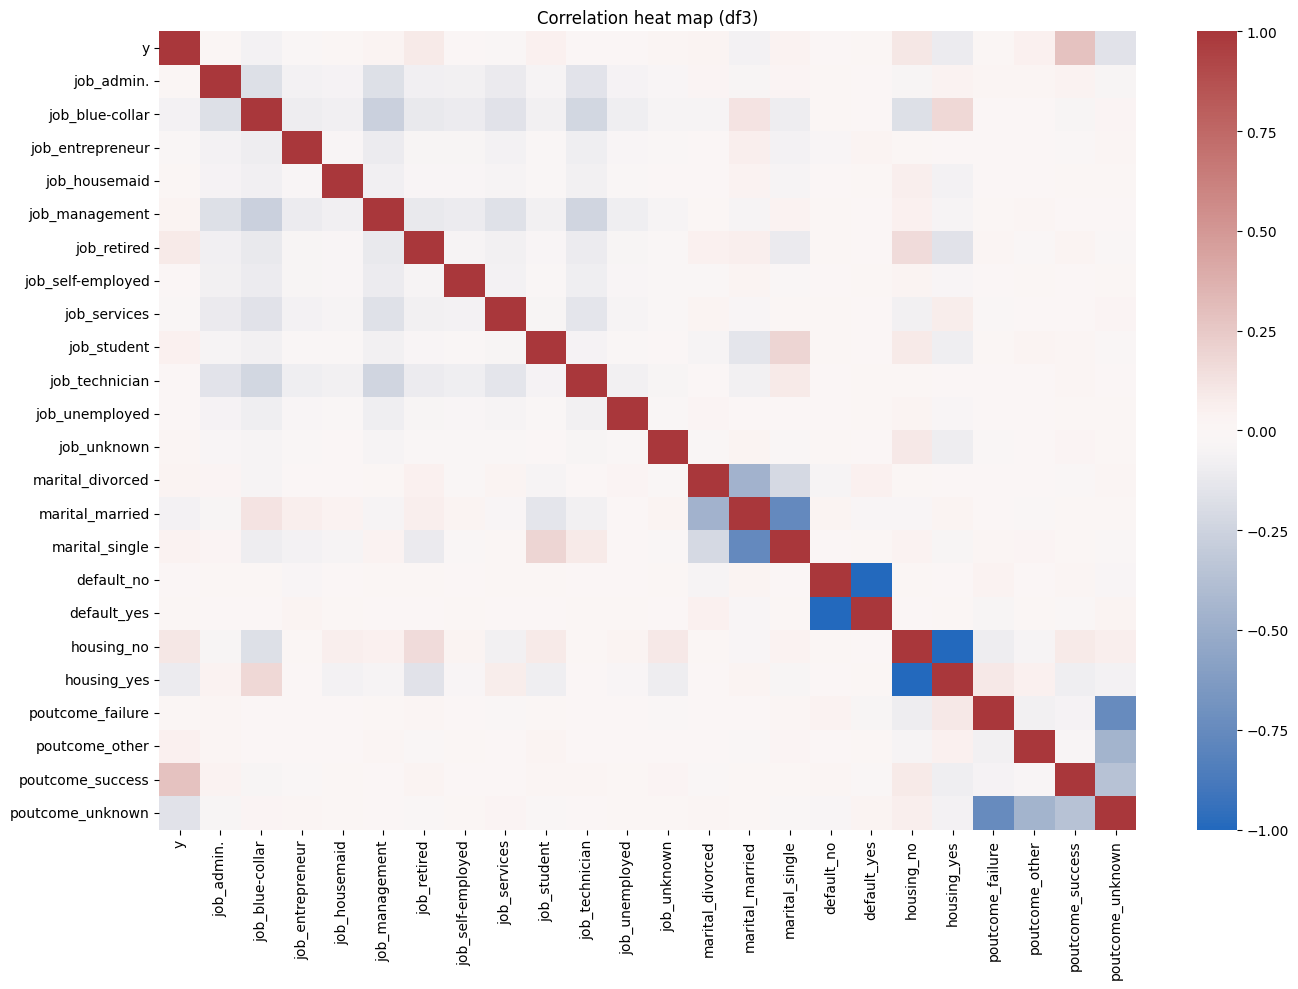

In [11]:
# 6)
corr = df3.corr(numeric_only=True)

plt.figure(figsize=(14, 10))
sns.heatmap(corr, cmap="vlag", center=0, annot=False, square=False)
plt.title("Correlation heat map (df3)")
plt.tight_layout()
plt.show()



Confusion matrix:
 [[991   5]
 [113  22]]
Accuracy: 0.8956675508399646


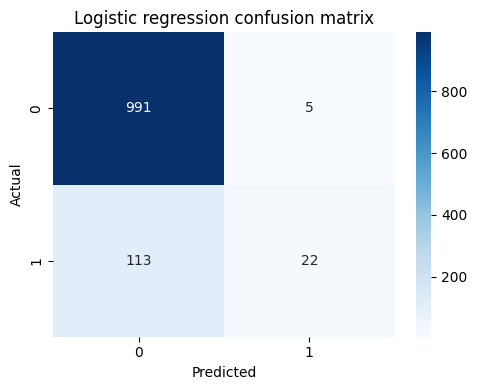

In [13]:

# 7) 
y = df3['y'].values
X = df3.drop(columns=['y']).values

# 8) 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25
)

# 9) 
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# 10) 
y_pred = log_reg.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

print("\nConfusion matrix:\n", cm)
print("Accuracy:", acc)


plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic regression confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()


### Exercise 5.2

Consider the data from CSV file `weight-height.csv`.

1) Read data into a pandas dataframe.

2) Pick the target variable `y` as weight in kilograms, and the feature variable `X` as height in centimeters.

3) Split the data into training and testing sets with 80/20 ratio.

4) Scale the training and testing data using normalization and standardization.

5) Fit a KNN regression model with `k=5` to the training data without scaling, predict on unscaled testing data and compute the $R^2$ value.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score


In [2]:
df = pd.read_csv("weight-height.csv")

# Convert weight to kilograms 
df['WeightKg'] = df['Weight'] * 0.453592

# Convert height to centimeters 
df['HeightCm'] = df['Height'] * 2.54


In [3]:
X = df[['HeightCm']]
y = df['WeightKg']


In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2
)


In [5]:
# Normalization (Min-Max scaling)
norm_scaler = MinMaxScaler()
X_train_norm = norm_scaler.fit_transform(X_train)
X_test_norm = norm_scaler.transform(X_test)

# Standardization (Z-score scaling)
std_scaler = StandardScaler()
X_train_std = std_scaler.fit_transform(X_train)
X_test_std = std_scaler.transform(X_test)


In [7]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict on unscaled test data
y_pred = knn.predict(X_test)

r2 = r2_score(y_test, y_pred)
print("R² score (unscaled KNN):", r2)


R² score (unscaled KNN): 0.831261980440498
